In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [59]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import metrics


In [5]:
df = pd.read_csv('data.csv')

## explore the data 

In [6]:
df.describe()

,ID,Salary,AvgPointsPerGame,OWN,G,W,L,WR,K,D,...,CS,CSPM,G.1,GPM,KPAR,KS,GS,CP,rOWN,rFPTS
count,1.100000e+02,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,...,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,1.447025e+07,7434.545455,0.253273,0.096364,18.109091,8.636364,9.472727,0.385727,2.125818,1.959273,...,177.997455,5.342182,8.720909,261.381818,0.563000,0.174364,0.151091,7.390909,0.058000,43.136727
std,5.950645e+01,2310.583403,0.335242,0.082626,11.265231,5.744926,6.303791,0.216403,1.636732,1.087628,...,121.015006,3.590578,5.634496,167.302669,0.287895,0.122493,0.096292,4.942041,0.072159,47.109096
min,1.447015e+07,3800.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.447020e+07,5650.000000,0.020000,0.030000,7.250000,3.250000,4.000000,0.335000,0.647500,1.607500,...,40.110000,1.200000,0.000000,0.000000,0.620000,0.052500,0.000000,3.000000,0.000000,0.000000
50%,1.447024e+07,6900.000000,0.100000,0.080000,22.000000,10.000000,11.000000,0.440000,2.040000,2.315000,...,189.830000,5.660000,10.800000,327.000000,0.690000,0.195000,0.190000,8.000000,0.030000,31.810000
75%,1.447029e+07,9225.000000,0.370000,0.110000,27.000000,12.000000,14.750000,0.520000,3.332500,2.680000,...,271.855000,8.380000,12.675000,384.000000,0.730000,0.260000,0.220000,11.000000,0.100000,81.010000
max,1.447037e+07,12600.000000,1.270000,0.310000,31.000000,19.000000,19.000000,0.770000,7.330000,3.500000,...,400.000000,10.330000,18.900000,488.000000,0.840000,0.410000,0.270000,18.000000,0.390000,194.160000


In [7]:
df.columns

Index(['Position', 'Name + ID', 'Name', 'ID', 'Roster Position', 'Salary',
       'Game Info', 'TeamAbbrev', 'AvgPointsPerGame', 'OWN', 'G', 'W', 'L',
       'WR', 'K', 'D', 'A', 'KDA', 'CS', 'CSPM', 'G.1', 'GPM', 'KPAR', 'KS',
       'GS', 'CP', 'rOWN', 'rFPTS'],
      dtype='object')

## dataframe with values of interest

In [8]:
df2 = df[['Name', 'Salary', 'TeamAbbrev', 'AvgPointsPerGame','OWN', 'K', 'CS', 'rOWN', 'rFPTS']]

In [9]:
df2

,Name,Salary,TeamAbbrev,AvgPointsPerGame,OWN,K,CS,rOWN,rFPTS
0,Morgan,7400,WE,0.28,0.12,2.33,232.19,0.13,102.92
1,ADD,7000,BLG,0.51,0.17,3.00,218.00,0.15,0.60
2,Nuguri,6800,DWG,0.14,0.05,2.83,291.90,0.06,92.50
3,Kiin,6600,AF,0.17,0.08,2.10,292.19,0.08,48.62
4,Doran,6200,DRX,0.20,0.09,2.22,270.70,0.10,86.48
...,...,...,...,...,...,...,...,...,...
105,huanfeng,6800,SN,0.38,0.08,4.78,314.61,0.16,88.44
106,Deft,6600,DRX,0.44,0.11,4.00,332.63,0.19,88.02
107,ZWuji,6400,RW,0.00,0.07,0.00,0.00,0.06,94.56
108,Aiming,6200,KT,0.42,0.11,3.86,315.00,0.11,13.64


## correlation between values

In [10]:
df2.corr()

,Salary,AvgPointsPerGame,OWN,K,CS,rOWN,rFPTS
Salary,1.000000,0.512005,0.333779,0.524122,0.481155,-0.153486,-0.180400
AvgPointsPerGame,0.512005,1.000000,0.828417,0.709006,0.465438,0.331052,0.193462
OWN,0.333779,0.828417,1.000000,0.359237,0.147367,0.505630,0.244534
K,0.524122,0.709006,0.359237,1.000000,0.869487,0.095909,0.101436
CS,0.481155,0.465438,0.147367,0.869487,1.000000,-0.019072,0.014296
rOWN,-0.153486,0.331052,0.505630,0.095909,-0.019072,1.000000,0.641939
rFPTS,-0.180400,0.193462,0.244534,0.101436,0.014296,0.641939,1.000000


## distribution of variable of interest 

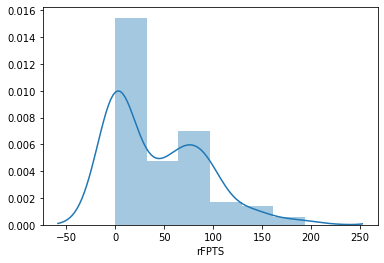

In [11]:

sns.distplot(df2['rFPTS'])

## heatmap with the correlation amongst columns

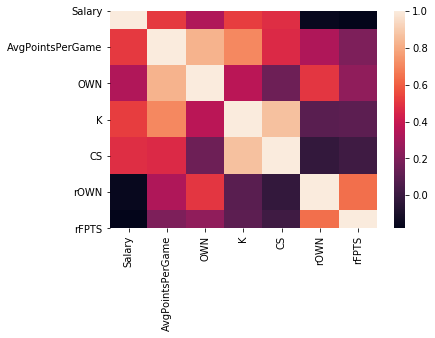

In [12]:
sns.heatmap(df2.corr())

In [13]:
df.columns

Index(['Position', 'Name + ID', 'Name', 'ID', 'Roster Position', 'Salary',
       'Game Info', 'TeamAbbrev', 'AvgPointsPerGame', 'OWN', 'G', 'W', 'L',
       'WR', 'K', 'D', 'A', 'KDA', 'CS', 'CSPM', 'G.1', 'GPM', 'KPAR', 'KS',
       'GS', 'CP', 'rOWN', 'rFPTS'],
      dtype='object')

In [14]:
df3 = df[['Name','Salary',
       'TeamAbbrev', 'AvgPointsPerGame', 'OWN', 'G', 'W', 'L',
       'WR', 'K', 'D', 'A', 'KDA', 'CS', 'CSPM', 'G.1', 'GPM', 'KPAR', 'KS',
       'GS', 'CP', 'rOWN', 'rFPTS']]

In [15]:
X= df[['Salary', 'OWN', 'G', 'W', 'L',
       'WR', 'K', 'D', 'A', 'KDA', 'CS', 'CSPM', 'G.1', 'GPM', 'KPAR', 'KS',
       'GS', 'CP']]

y = df[['rFPTS']]

## Splitting data for Machine learning algorithm

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## create + train model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
#obstance it a linear model'

lm = LinearRegression()

In [21]:
# fitting linear model
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# intercept of model
print(lm.intercept_)
# coefficients of model
a = lm.coef_[0]

[81.90190143]


In [23]:
cdf = pd.DataFrame(a,X_train.columns, columns = ['Coeff'])

In [24]:
cdf

,Coeff
Salary,-0.009303
OWN,299.126385
G,-0.401413
W,4.452083
L,-4.853496
WR,-213.532450
K,-39.106115
D,26.094997
A,22.852336
KDA,-13.999261


## Predictions for Model

In [25]:
predictions = lm.predict(X_test)

In [26]:
predictions

array([[ 10.64935348],
       [ 47.76793966],
       [ 43.11259488],
       [ 52.13604267],
       [ 67.42567455],
       [ 89.22917226],
       [ 24.57726399],
       [ 41.49334472],
       [ 46.95080803],
       [ 69.40263184],
       [ 34.75399195],
       [ 32.67409068],
       [ 86.63857869],
       [ 84.18434944],
       [100.18321434],
       [-18.37119705],
       [-15.84840276],
       [ 59.64583787],
       [  0.24120192],
       [ 82.62288565],
       [ 50.22189225],
       [ 55.74999136],
       [ 33.12619956],
       [ 91.49046169],
       [ 98.12589038],
       [ -0.8296871 ],
       [ 86.62561944],
       [ 82.78272722],
       [ 51.8906206 ],
       [ 48.32838435],
       [ 78.34959561],
       [ 76.63699375],
       [-11.37037198],
       [ 28.00990959],
       [115.28888063],
       [  5.52305614],
       [108.28878599],
       [ 16.05025706],
       [ 80.86742652],
       [ 67.78321701],
       [132.60661974],
       [ 81.7944733 ],
       [ 61.50645701],
       [ 35

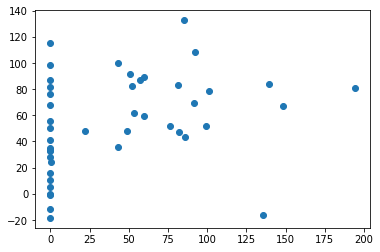

In [27]:
plt.scatter(y_test, predictions)

## Plot Model error

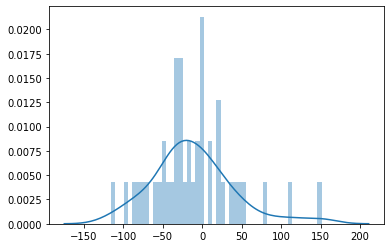

In [28]:
sns.distplot(y_test-predictions, bins = 50)

## metrics

In [29]:
from sklearn import metrics

In [30]:
metrics.mean_absolute_error(y_test,predictions)

40.43102719064568

In [31]:
metrics.mean_squared_error(y_test,predictions)

2810.3525136576645

In [32]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

53.01275802726797

# Logistic Regression

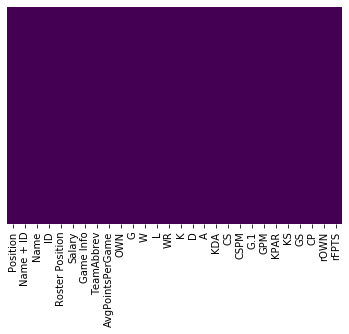

In [33]:
# look for columns that are missing a lot of information
sns.heatmap(df.isnull(), yticklabels = False, cbar =False, cmap ='viridis')

In [34]:
## change the style of the white grid

sns.set_style('whitegrid')

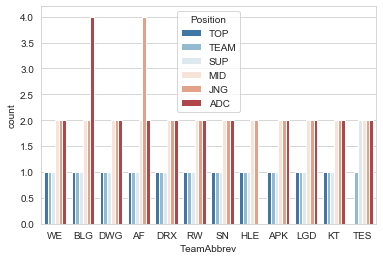

In [35]:
### count plot of categories

sns.countplot(x = 'TeamAbbrev', 
              hue = 'Position', data = df, palette = 'RdBu_r')

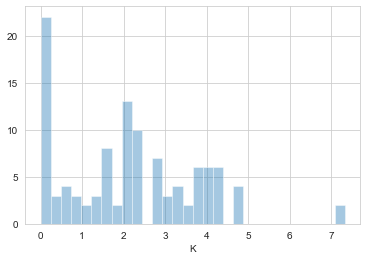

In [36]:
sns.distplot(df['K'], kde= False, bins = 30)

In [37]:
df['K'].iplot(kind = 'hist', bins = 10)

## converting string categories to numbers for a classification model

In [52]:
df.head()

,Position,Name + ID,Name,ID,Roster Position,Salary,Game Info,TeamAbbrev,AvgPointsPerGame,OWN,...,CS,CSPM,G.1,GPM,KPAR,KS,GS,CP,rOWN,rFPTS
0,TOP,Morgan (14470218),Morgan,14470218,TOP,7400,LGD@WE 04/02/2020 02:00AM ET,WE,0.28,0.12,...,232.19,7.45,11.5,369.0,0.58,0.16,0.21,7.0,0.13,102.92
1,TOP,ADD (14470228),ADD,14470228,TOP,7000,RW@BLG 04/02/2020 04:00AM ET,BLG,0.51,0.17,...,218.00,6.89,11.6,366.0,0.74,0.20,0.21,2.0,0.15,0.60
2,TOP,Nuguri (14470184),Nuguri,14470184,TOP,6800,DWG@HLE 04/02/2020 04:00AM ET,DWG,0.14,0.05,...,291.90,8.66,13.7,406.0,0.64,0.26,0.23,16.0,0.06,92.50
3,TOP,Kiin (14470154),Kiin,14470154,TOP,6600,AF@APK 04/02/2020 02:00AM ET,AF,0.17,0.08,...,292.19,8.31,13.4,381.0,0.62,0.20,0.23,13.0,0.08,48.62
4,TOP,Doran (14470193),Doran,14470193,TOP,6200,KT@DRX 04/02/2020 05:30AM ET,DRX,0.20,0.09,...,270.70,8.10,12.6,377.0,0.56,0.18,0.21,9.0,0.10,86.48


In [53]:
pos = pd.get_dummies(df['Position'], drop_first=True)

In [54]:
team = pd.get_dummies(df['TeamAbbrev'], drop_first = True)

In [56]:
train = pd.concat([df, pos, team], axis = 1)

In [58]:
train.columns

Index(['Position', 'Name + ID', 'Name', 'ID', 'Roster Position', 'Salary',
       'Game Info', 'TeamAbbrev', 'AvgPointsPerGame', 'OWN', 'G', 'W', 'L',
       'WR', 'K', 'D', 'A', 'KDA', 'CS', 'CSPM', 'G.1', 'GPM', 'KPAR', 'KS',
       'GS', 'CP', 'rOWN', 'rFPTS', 'JNG', 'MID', 'SUP', 'TEAM', 'TOP', 'APK',
       'BLG', 'DRX', 'DWG', 'HLE', 'KT', 'LGD', 'RW', 'SN', 'TES', 'WE'],
      dtype='object')

In [43]:
dfcopy = df.copy()

In [49]:
train = pd.concat([dfcopy, Roster Position, TeamAbbrev], axis=1)

SyntaxError: invalid syntax (<ipython-input-49-bf0f41aa056b>, line 1)

# Housing price data set

In [38]:
from sklearn.datasets import load_boston

In [39]:
boston = load_boston()

In [40]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Shell for Classification Model

In [ ]:
X = train.drop('label', axis = 1) ### remove label and save as variable y
y = train['label']

In [ ]:
d

In [ ]:
### splitting the data

X_test, y_train, y_test = train_test_split(X, y,
                                          test_size=0.3,
                                          random_state=101)

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(X_train, y_train)

In [ ]:
predictions = logmodel.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, predictions))

In [62]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, predicition)

In [ ]:
## instead of using the test and train csv, 1. try using the entire 
##trainning set. 2. grab the title of the name and use that as feature
